## Descrição do Problema, Dados e Variáveis
### Problema
O problema abordado pelo State of Data Brazil 2023 é o mapeamento do mercado de trabalho na área de dados no Brasil. O objetivo é identificar tendências, desafios e oportunidades para profissionais de dados, como cientistas de dados, engenheiros de dados e analistas de dados. A pesquisa busca compreender aspectos como perfis profissionais, remuneração, rotatividade, impacto do trabalho remoto, uso de tecnologias emergentes (como AI Generativa e LLMs) e fatores de satisfação no ambiente de trabalho.


In [201]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Get File Path and load Dataframe

In [202]:
def get_file_path():
    import os
    # Load the data
    if os.path.exists('/kaggle'):
        file_path = '/kaggle/input/state-of-data-brazil-2023/State_of_data_BR_2023_Kaggle - df_survey_2023.csv'
    else:
        default_directory = '/home/nerton/Projects/kaggle'
        os.chdir(default_directory)
        file_path = './input/state-of-data-brazil-2023⁄State_of_data_BR_2023_Kaggle.csv'
    return file_path


In [203]:
# Carregando o DataFrame
file_path = get_file_path()
df = pd.read_csv(file_path)
df.head()



,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')","('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')","('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')",...,"('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P8_d_12 ', 'Treinando e aplicando LLM's para solucionar problemas de negócio.')"
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,31,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0026aa3fwd78u0026asg7456tfkjg2cs,30,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00r21rb9pusd1b0v7ew00r21rw3dy69w,37,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00urm3jf2cek12w6ygue00urm3jzd17j,22,22-24,Masculino,Preta,Não,Não acredito que minha experiência profissiona...,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00v0az4g792svil00vn6y1kfm9hq8vy9,34,30-34,Masculino,Branca,Não,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Listar Colunas

In [227]:
from pprint import pprint

# Listar os nomes das colunas no DataFrame de forma legível
columns = df.columns.tolist()
print("Colunas do DataFrame:")
pprint(columns)

Colunas do DataFrame:
["('P0', 'id')",
 "('P1_a ', 'Idade')",
 "('P1_a_1 ', 'Faixa idade')",
 "('P1_b ', 'Genero')",
 "('P1_c ', 'Cor/raca/etnia')",
 "('P1_d ', 'PCD')",
 "('P1_e ', 'experiencia_profissional_prejudicada')",
 "('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')",
 "('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')",
 "('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')",
 "('P1_e_4 ', 'Experiencia prejudicada devido ao fato de ser PCD')",
 "('P1_f ', 'aspectos_prejudicados')",
 "('P1_f_1', 'Quantidade de oportunidades de emprego/vagas recebidas')",
 "('P1_f_2', 'Senioridade das vagas recebidas em relação à sua experiência')",
 "('P1_f_3', 'Aprovação em processos seletivos/entrevistas')",
 "('P1_f_4', 'Oportunidades de progressão de carreira')",
 "('P1_f_5', 'Velocidade de progressão de carreira')",
 "('P1_f_6', 'Nível de cobrança no trabalho/Stress no trabalho')",
 "('P1_f_7', 'Atenção dada diante das min

### Análise Univariada
1.1 Distribuição de Variável Qualitativa  
1.2 Distribuição de Variável Quantitativa  


In [ ]:
# Análise Qualitativa de Colunas
def analyze_quali_column(column_name):
    print(f"Análise da Coluna: {column_name}")
    print(f"Valores Únicos: {df[column_name].unique()}")
    print(f"Quantidade de Valores Únicos: {df[column_name].nunique()}")
    print(f"Quantidade de Valores Nulos: {df[column_name].isnull().sum()}")
    print(f"Valores Nulos: {df[column_name][df[column_name].isnull()]}")
    print(f"Contagem de Frequência dos Valores: {df[column_name].value_counts()}")
    print("\n")
    return

def make_graph_column(column_name):
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column_name, order = df[column_name].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()
    return

# Análise Quantitativa de Colunas
def analyze_quanti_column(column_name):
    print(f"Análise da Coluna: {column_name}")
    print(f"Valores Únicos: {df[column_name].unique()}")
    print(f"Quantidade de Valores Únicos: {df[column_name].nunique()}")
    print(f"Quantidade de Valores Nulos: {df[column_name].isnull().sum()}")
    print(f"Valores Nulos: {df[column_name][df[column_name].isnull()]}")
    print(f"Média: {df[column_name].mean()}")
    print(f"Mediana: {df[column_name].median()}")
    print(f"Desvio Padrão: {df[column_name].std()}")
    print(f"Valor Mínimo: {df[column_name].min()}")
    print(f"Valor Máximo: {df[column_name].max()}")
    print("\n")
    return

def make_histogram_column(column_name):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    df[column_name].dropna().plot(kind='hist', bins=20, edgecolor='black')
    plt.title(f'Distribuição da Variável Quantitativa: {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequência')
    plt.show()
    return

Análise da Coluna: ('P1_b ', 'Genero')
Valores Únicos: ['Masculino' 'Feminino' 'Outro' 'Prefiro não informar']
Quantidade de Valores Únicos: 4
Quantidade de Valores Nulos: 0
Valores Nulos: Series([], Name: ('P1_b ', 'Genero'), dtype: object)
Contagem de Frequência dos Valores: ('P1_b ', 'Genero')
Masculino               3975
Feminino                1293
Prefiro não informar      16
Outro                      9
Name: count, dtype: int64




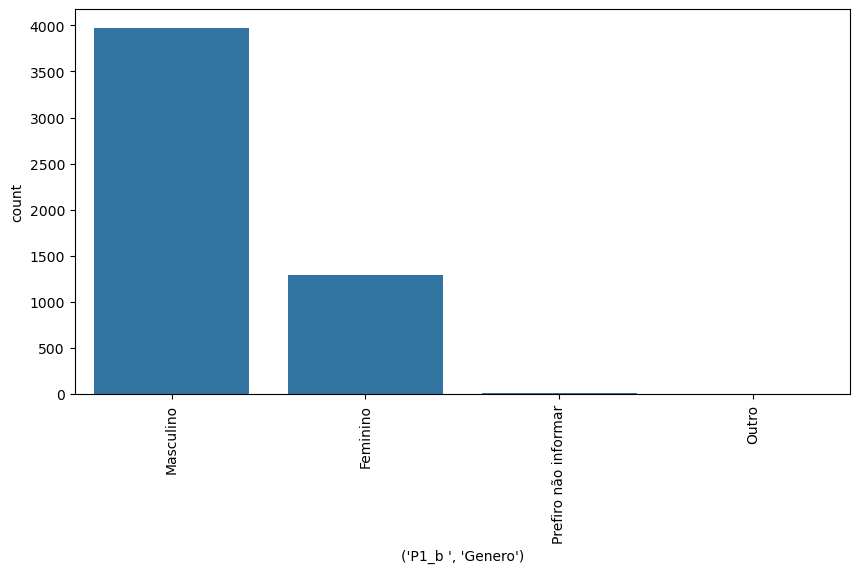

NameError: name 'analyze_quanti_column' is not defined

In [ ]:
# Análise qualitativa
analyze_quali_column("('P1_b ', 'Genero')")
make_graph_column("('P1_b ', 'Genero')")

# Análise quantitativa
analyze_quanti_column("('P1_a ', 'Idade')")
make_histogram_column("('P1_a ', 'Idade')")